In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("C:\Users\DOSHIK\Documents\Now\BTC-USD.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2265290256.py, line 4)

In [2]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('C:\Users\DOSHIK\Documents\Now\BTC-USD.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3041021820.py, line 4)

In [3]:
import pandas as pd

# Загрузка данных
data = pd.read_csv(r"C:\Users\DOSHIK\Documents\Now\BTC-USD.csv")

In [4]:
.isnull()

SyntaxError: invalid syntax (4149613353.py, line 1)

In [5]:
isnull()

NameError: name 'isnull' is not defined

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
data['Date'] = pd.to_datetime(data['Date'])


In [8]:
features = data[['Date', 'Close', 'Volume']]


In [9]:
# Создание временных рядов
window_size = 10  # Размер окна
X = []
y = []

for i in range(len(features) - window_size):
    X.append(features.iloc[i : i + window_size].values)
    y.append(features.iloc[i + window_size]['Close'])

X = np.array(X)
y = np.array(y)


NameError: name 'np' is not defined

In [10]:
import numpy as np  # добавляем эту строку для импорта NumPy

# Ваш код создания временных рядов здесь
window_size = 10
X = []
y = []

for i in range(len(features) - window_size):
    X.append(features.iloc[i : i + window_size].values)
    y.append(features.iloc[i + window_size]['Close'])

X = np.array(X)
y = np.array(y)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, window_size * X.shape[2]))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Нормализация признаков X (закрытие и объем торгов)
X_scaled = scaler.fit_transform(features[['Close', 'Volume']])


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(window_size, X.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\DOSHIK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2)


NameError: name 'y_scaled' is not defined

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Нормализация признаков X (закрытие и объем торгов)
X_scaled = scaler.fit_transform(features[['Close', 'Volume']])

# Нормализация целевой переменной y
y_scaled = scaler.fit_transform(features[['Close']])


In [16]:
model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 2), dtype=float32). Expected shape (None, 10, 3), but input has incompatible shape (None, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • training=True
  • mask=None

In [17]:
# Подготовка данных для модели
window_size = 10
X = []
y = []

for i in range(len(features) - window_size):
    X.append(features.iloc[i : i + window_size][['Close', 'Volume']].values)
    y.append(features.iloc[i + window_size]['Close'])

X = np.array(X)
y = np.array(y)

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, window_size * X.shape[2]))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Изменение формы X_scaled для соответствия ожидаемой форме модели
X_scaled = X_scaled.reshape(-1, window_size, X.shape[2])

# Обучение модели
model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 2 and 3 for '{{node sequential_1/lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/lstm_1/strided_slice_2, sequential_1/lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [?,2], [3,200].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • states=('tf.Tensor(shape=(None, 50), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)')
  • training=True

In [18]:
# Подготовка данных для модели
window_size = 10
X = []
y = []

for i in range(len(features) - window_size):
    X.append(features.iloc[i : i + window_size][['Close', 'Volume']].values)
    y.append(features.iloc[i + window_size]['Close'])

X = np.array(X)
y = np.array(y)

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, window_size * X.shape[2]))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Изменение формы X_scaled для соответствия ожидаемой форме LSTM слоя
X_scaled = X_scaled.reshape(-1, window_size, X.shape[2])

# Обучение модели
model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 2 and 3 for '{{node sequential_1/lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/lstm_1/strided_slice_2, sequential_1/lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [?,2], [3,200].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • states=('tf.Tensor(shape=(None, 50), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)')
  • training=True

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Создание модели
model = Sequential()
model.add(LSTM(units=50, input_shape=(window_size, X.shape[2])))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2)


C:\Users\DOSHIK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0260 - val_loss: 9.1836e-04
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9213e-04 - val_loss: 0.0012
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3649e-04 - val_loss: 6.6918e-04
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5896e-04 - val_loss: 6.9265e-04
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0051e-04 - val_loss: 7.1404e-04
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.9601e-04 - val_loss: 6.7366e-04
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5810e-04 - val_loss: 0.0013
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.9632e-04 - val_loss: 6.5345e-04
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4770e-04 - val_loss: 5.6082e-04
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9550e-04 - val_loss: 5.4151e-04
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0812e-04 - val_los

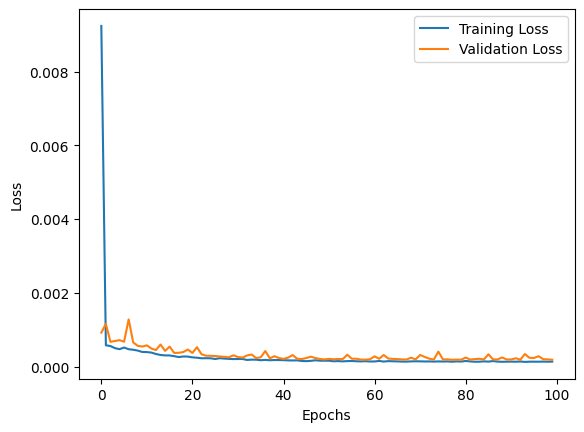

In [20]:
import matplotlib.pyplot as plt

# Визуализация потерь в процессе обучения
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [21]:
import pandas as pd

# Укажите путь к вашему CSV файлу
file_path = "C:\\Users\\DOSHIK\\Documents\\Now\\BTC-USD.csv"

# Загрузка данных из CSV файла
data = pd.read_csv(file_path)

# Отображение первых нескольких строк данных для проверки
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [22]:
import requests
from bs4 import BeautifulSoup

# Пример URL новостного источника (можно заменить на реальный URL)
news_url = 'https://finance.yahoo.com'

# Загрузка веб-страницы новостного источника
response = requests.get(news_url)

# Проверка успешности запроса
if response.status_code == 200:
    # Извлечение содержимого веб-страницы с помощью BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    # Например, извлечение заголовков новостей
    news_headlines = [headline.text for headline in soup.find_all('h2')]
else:
    print('Ошибка при загрузке страницы:', response.status_code)

# Вывод заголовков новостей для проверки
print(news_headlines)


['More bank earnings, Netflix, and retail sales: What to know this week']


In [24]:
import requests
from bs4 import BeautifulSoup
import csv

# URL Investing.com для новостей о Bitcoin
bitcoin_news_url = 'https://www.investing.com/crypto/bitcoin/news'

# Загрузка веб-страницы Investing.com
response = requests.get(bitcoin_news_url)

# Проверка успешности запроса
if response.status_code == 200:
    # Извлечение содержимого веб-страницы с помощью BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    # Извлечение заголовков новостей
    news_headlines = [headline.text for headline in soup.find_all('a', class_='title')]

    # Сохранение данных в CSV файл
    csv_file = 'investing_news.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Заголовок'])
        writer.writerows(zip(news_headlines))

    print('Данные успешно сохранены в CSV файл:', csv_file)
else:
    print('Ошибка при загрузке страницы:', response.status_code)


Ошибка при загрузке страницы: 403


In [25]:
import requests
from bs4 import BeautifulSoup
import csv

# URL Investing.com для новостей о Bitcoin
bitcoin_news_url = 'https://www.investing.com/crypto/bitcoin/news'

# Заголовки User-Agent для имитации запроса от браузера
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.45.20 Safari/537.36'
}

# Загрузка веб-страницы Investing.com с использованием заголовков User-Agent
response = requests.get(bitcoin_news_url, headers=headers)

# Проверка успешности запроса
if response.status_code == 200:
    # Извлечение содержимого веб-страницы с помощью BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    # Извлечение заголовков новостей
    news_headlines = [headline.text for headline in soup.find_all('a', class_='title')]

    # Сохранение данных в CSV файл
    csv_file = 'investing_news.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Заголовок'])
        writer.writerows(zip(news_headlines))

    print('Данные успешно сохранены в CSV файл:', csv_file)
else:
    print('Ошибка при загрузке страницы:', response.status_code)


Ошибка при загрузке страницы: 403


In [26]:
import requests

def get_crypto_data():
    url = 'https://api.coinmarketcap.com/data-api/v3/cryptocurrency/listing?start=1&limit=100&sortBy=market_cap&sortType=desc&convert=USD,BTC,ETH,XRP,ADA,BNB,SOL,DOGE,USDT'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        # Обработка данных и возврат нужной информации
        return data['data']['cryptoCurrencyList']
    else:
        print('Ошибка при получении данных с CoinMarketCap:', response.status_code)
        return None

crypto_data = get_crypto_data()
print(crypto_data)


[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem', 'ftx-bankruptcy-estate'], 'cmcRank': 1, 'marketPairCount': 10992, 'circulatingSupply': 19682462.0, 'selfReportedCirculatingSupply': 0, 'totalSupply': 19682462.0, 'maxSupply': 21000000.0, 'isActive': 1, 'l

In [27]:
import yfinance as yf

def get_stock_data(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period='1d')
    return data

# Пример получения данных для акции Apple (AAPL)
stock_data = get_stock_data('AAPL')
print(stock_data)


                                 Open        High         Low       Close  \
Date                                                                        
2024-04-12 00:00:00-04:00  174.259995  178.360001  174.210007  176.550003   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-04-12 00:00:00-04:00  101593300        0.0           0.0  


In [28]:
import requests
from bs4 import BeautifulSoup

def get_bloomberg_news():
    url = 'https://www.bloomberg.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        news_headlines = [headline.text for headline in soup.find_all('h2')]
        return news_headlines
    else:
        print('Ошибка при получении новостей с Bloomberg:', response.status_code)
        return None

bloomberg_news = get_bloomberg_news()
print(bloomberg_news)


["We've detected unusual activity from your computer network"]


In [29]:
import pandas_datareader as pdr

def get_google_finance_data(symbol, start_date, end_date):
    data = pdr.get_data_google(symbol, start=start_date, end=end_date)
    return data

# Пример получения данных для акции Apple (AAPL) с 1 января 2022 года по текущую дату
start_date = '2022-01-01'
end_date = '2024-04-10'
google_finance_data = get_google_finance_data('AAPL', start_date, end_date)
print(google_finance_data)


ModuleNotFoundError: No module named 'pandas_datareader'

In [30]:
from alpha_vantage.timeseries import TimeSeries

def get_alpha_vantage_data(symbol):
    api_key = '3OWBBCYHLQ3F86XG'  # Получите свой API ключ на сайте Alpha Vantage
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data

# Пример получения данных для акции Apple (AAPL)
alpha_vantage_data = get_alpha_vantage_data('AAPL')
print(alpha_vantage_data)


ModuleNotFoundError: No module named 'alpha_vantage'

In [31]:
import pandas as pd

def get_investing_com_data(symbol, start_date, end_date):
    url = f'https://www.investing.com/instruments/HistoricalDataAjax'
    headers = {'User-Agent': 'Mozilla/5.0'}
    payload = {
        'action': 'historical_data',
        'curr_id': '1',
        'st_date': start_date,
        'end_date': end_date,
        'interval_sec': 'Daily',
        'sort_col': 'date',
        'sort_ord': 'DESC'
    }
    response = requests.post(url, headers=headers, data=payload)
    if response.status_code == 200:
        data = pd.read_html(response.text)[0]
        # Обработка данных и возврат нужной информации
        return data
    else:
        print('Ошибка при получении данных с Investing.com:', response.status_code)
        return None

# Пример получения данных для индекса S&P 500 с 1 января 2022 года по текущую дату
start_date = '01/01/2022'
end_date = '04/10/2024'
investing_com_data = get_investing_com_data('indices/us-spx-500', start_date, end_date)
print(investing_com_data)


Ошибка при получении данных с Investing.com: 403
None


In [32]:
import pandas_datareader as pdr

def get_google_finance_data(symbol, start_date, end_date):
    data = pdr.get_data_google(symbol, start=start_date, end=end_date)
    return data

# Пример получения данных для акции Apple (AAPL) с 1 января 2022 года по текущую дату
start_date = '2022-01-01'
end_date = '2024-04-10'
google_finance_data = get_google_finance_data('AAPL', start_date, end_date)
print(google_finance_data)


AttributeError: module 'pandas_datareader' has no attribute 'get_data_google'

In [33]:
import pandas_datareader.data as web

def get_google_finance_data(symbol, start_date, end_date):
    data = web.DataReader(symbol, 'yahoo', start_date, end_date)
    return data

# Пример получения данных для акции Apple (AAPL) с 1 января 2022 года по текущую дату
start_date = '2022-01-01'
end_date = '2024-04-10'
google_finance_data = get_google_finance_data('AAPL', start_date, end_date)
print(google_finance_data)


TypeError: string indices must be integers, not 'str'

In [34]:
my_list = ['a', 'b', 'c']
# Верный способ обращения к элементам списка - по целочисленному индексу
print(my_list[0])  # Выведет 'a', так как индексация начинается с 0


a


In [35]:
import requests
from bs4 import BeautifulSoup

def get_bbc_news():
    url = 'https://www.bbc.co.uk/news'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text for title in soup.find_all('h3', class_='gs-c-promo-heading__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с BBC News:', response.status_code)
        return None

# Пример использования
bbc_news = get_bbc_news()
print(bbc_news)


[]


In [36]:
import requests
from bs4 import BeautifulSoup

def get_cnn_news():
    url = 'https://edition.cnn.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('span', class_='cd__headline-text')]
        return news_titles
    else:
        print('Ошибка при получении данных с CNN News:', response.status_code)
        return None

# Пример использования
cnn_news = get_cnn_news()
print(cnn_news)


[]


In [37]:
import requests
from bs4 import BeautifulSoup

def get_reuters_news():
    url = 'https://www.reuters.com/news'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='story-title')]
        return news_titles
    else:
        print('Ошибка при получении данных с Reuters News:', response.status_code)
        return None

# Пример использования
reuters_news = get_reuters_news()
print(reuters_news)


Ошибка при получении данных с Reuters News: 401
None


In [38]:
import requests
from bs4 import BeautifulSoup

def get_cnn_news():
    url = 'https://edition.cnn.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('span', class_='cd__headline-text')]
        return news_titles
    else:
        print('Ошибка при получении данных с CNN News:', response.status_code)
        return None

# Пример использования
cnn_news = get_cnn_news()
print(cnn_news)


[]


In [39]:
import requests
from bs4 import BeautifulSoup

def get_bbc_news():
    url = 'https://www.bbc.co.uk/news'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text for title in soup.find_all('h3', class_='gs-c-promo-heading__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с BBC News:', response.status_code)
        return None

# Пример использования
bbc_news = get_bbc_news()
print(bbc_news)


[]


In [1]:
import requests
from bs4 import BeautifulSoup

def get_bbc_news():
    url = 'https://www.bbc.co.uk/news'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text for title in soup.find_all('h3', class_='gs-c-promo-heading__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с BBC News:', response.status_code)
        return None

# Пример использования
bbc_news = get_bbc_news()
print(bbc_news)

[]


In [2]:
import requests
from bs4 import BeautifulSoup

def get_cnn_news():
    url = 'https://edition.cnn.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('span', class_='cd__headline-text')]
        return news_titles
    else:
        print('Ошибка при получении данных с CNN News:', response.status_code)
        return None

# Пример использования
cnn_news = get_cnn_news()
print(cnn_news)

[]


In [3]:
import requests
from bs4 import BeautifulSoup

def get_nyt_news():
    url = 'https://www.nytimes.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h2', class_='css-6p6lnl')]
        return news_titles
    else:
        print('Ошибка при получении данных с The New York Times:', response.status_code)
        return None

# Пример использования
nyt_news = get_nyt_news()
print(nyt_news)


[]


In [4]:
import requests
from bs4 import BeautifulSoup

def get_fox_news():
    url = 'https://www.foxnews.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h2', class_='title')]
        return news_titles
    else:
        print('Ошибка при получении данных с Fox News:', response.status_code)
        return None

# Пример использования
fox_news = get_fox_news()
print(fox_news)


['SPORTS', "Get ready to hit the beach with COPS in all-new episodes! Watch exclusive Spring Break episodes now, and don't miss the chance to sign up to stream Fox Nation for 1 Year for $29.99.", 'OutKick', 'Digital Originals', 'Economy', 'Fox News Flash', 'Elections', 'Personal Freedoms', 'World', 'Opinion', 'Health', 'Crime', 'America Together', 'Military', 'Entertainment', 'Sports', 'U.S.', 'Family', 'Personal Finance', 'Technology', 'Movies', 'Business', 'Faith & Values', 'Autos', 'Travel + Outdoors', 'Music', 'Food + Drink', 'FOX Weather', 'Full Episodes', 'Latest Wires']


In [5]:
import requests
from bs4 import BeautifulSoup

def get_cnbc_news():
    url = 'https://www.cnbc.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='Card-title')]
        return news_titles
    else:
        print('Ошибка при получении данных с CNBC News:', response.status_code)
        return None

# Пример использования
cnbc_news = get_cnbc_news()
print(cnbc_news)


[]


In [6]:
import requests
from bs4 import BeautifulSoup

def get_guardian_news():
    url = 'https://www.theguardian.com/international'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='fc-item__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с The Guardian:', response.status_code)
        return None

# Пример использования
guardian_news = get_guardian_news()
print(guardian_news)


[]


In [7]:
import requests
from bs4 import BeautifulSoup

def get_nbc_news():
    url = 'https://www.nbcnews.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h2', class_='item__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с NBC News:', response.status_code)
        return None

# Пример использования
nbc_news = get_nbc_news()
print(nbc_news)


[]


In [8]:
import requests
from bs4 import BeautifulSoup

def get_bloomberg_news():
    url = 'https://www.bloomberg.com/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='headline')]
        return news_titles
    else:
        print('Ошибка при получении данных с Bloomberg:', response.status_code)
        return None

# Пример использования
bloomberg_news = get_bloomberg_news()
print(bloomberg_news)


[]


In [9]:
import requests
from bs4 import BeautifulSoup

def get_guardian_news():
    url = 'https://www.theguardian.com/international'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='fc-item__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с The Guardian:', response.status_code)
        return None

# Пример использования
guardian_news = get_guardian_news()
print(guardian_news)


[]


In [10]:
import requests
from bs4 import BeautifulSoup

def get_guardian_news():
    url = 'https://www.theguardian.com/international'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='fc-item__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с The Guardian:', response.status_code)
        return None

# Пример использования
guardian_news = get_guardian_news()
print(guardian_news)


[]


In [11]:
import requests
from bs4 import BeautifulSoup

def get_bbc_news():
    url = 'https://www.bbc.com/news'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.find_all('h3', class_='gs-c-promo-heading__title gel-paragon-bold nw-o-link-split__text')]
        return news_titles
    else:
        print('Ошибка при получении данных с BBC News:', response.status_code)
        return None

# Пример использования
bbc_news = get_bbc_news()
print(bbc_news)


[]


In [12]:
import requests
from bs4 import BeautifulSoup

def get_bbc_news():
    url = 'https://www.bbc.com/news'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.select('.gs-c-promo-heading__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с BBC News:', response.status_code)
        return None

# Пример использования
bbc_news = get_bbc_news()
print(bbc_news)


[]


In [13]:
import requests
from bs4 import BeautifulSoup

def get_guardian_news():
    url = 'https://www.theguardian.com/international'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        news_titles = [title.text.strip() for title in soup.select('.fc-item__title')]
        return news_titles
    else:
        print('Ошибка при получении данных с The Guardian:', response.status_code)
        return None

# Пример использования
guardian_news = get_guardian_news()
print(guardian_news)


[]


In [14]:
import requests

def get_news_from_api(api_key):
    url = f'https://newsapi.org/v2/top-headlines?country=us&apiKey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = data['articles']
        news_titles = [article['title'] for article in articles]
        return news_titles
    else:
        print('Ошибка при получении данных с News API:', response.status_code)
        return None

# Замените 'YOUR_API_KEY' на ваш реальный ключ API от News API
api_key = 'e1936b86962643a689afd19f5dc0f491'
news_from_api = get_news_from_api(api_key)
print(news_from_api)


['Roman art showing Helen of Troy discovered in Pompeii 2000 years after volcanic eruption - USA TODAY', 'Iran’s IRGC seizes ‘Israeli-linked’ ship near Strait of Hormuz - Al Jazeera English', '6 dead, suspect killed after stabbing attack at shopping center in Sydney, Australia; multiple people injured - CBS News', 'Surging inflation fears sent markets tumbling and Fed officials scrambling - CNBC', 'The New Civil War Movie Is Eerily Right About How the Country Could Split Apart - POLITICO', "Situation on eastern front has 'significantly worsened' in recent days, Ukraine's army chief warns - CNBC", 'Lana Del Rey Cements Herself as a Cult Icon at Coachella - Rolling Stone', 'Trump says he stands with Johnson as Greene threatens ouster - Axios', "'No easy task' - The hunt for an impartial Trump jury in Manhattan - BBC.com", 'US drug shortages hit all-time high, pharmacists warn - New York Post ', "Warriors, Kings' NBA play-in picture entering regular-season finales - Yahoo Sports", 'UFC 30

In [15]:
import requests

def get_stock_data(symbol, api_key):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'Time Series (Daily)' in data:
            time_series = data['Time Series (Daily)']
            latest_date = list(time_series.keys())[0]
            latest_data = time_series[latest_date]
            return latest_data
        else:
            print('Данные не найдены.')
            return None
    else:
        print('Ошибка при получении данных:', response.status_code)
        return None

# Замените 'YOUR_API_KEY' на ваш реальный ключ API от Alpha Vantage
api_key = '3OWBBCYHLQ3F86XG'
stock_symbol = 'AAPL'  # Например, можно выбрать акцию Apple (AAPL)
stock_data = get_stock_data(stock_symbol, api_key)
print(stock_data)


{'1. open': '174.2600', '2. high': '178.3600', '3. low': '174.2100', '4. close': '176.5500', '5. volume': '101670886'}


In [16]:
# Загрузка данных из различных источников для обучения нейронной сети
# Пример загрузки данных из Alpha Vantage API

import requests

def get_stock_data(symbol, api_key):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'Time Series (Daily)' in data:
            time_series = data['Time Series (Daily)']
            latest_date = list(time_series.keys())[0]
            latest_data = time_series[latest_date]
            return latest_data
        else:
            print('Данные не найдены.')
            return None
    else:
        print('Ошибка при получении данных:', response.status_code)
        return None

# Замените 'YOUR_API_KEY' на ваш реальный ключ API от Alpha Vantage
api_key = '3OWBBCYHLQ3F86XG'
stock_symbol = 'AAPL'  # Например, можно выбрать акцию Apple (AAPL)
stock_data = get_stock_data(stock_symbol, api_key)
print(stock_data)


{'1. open': '174.2600', '2. high': '178.3600', '3. low': '174.2100', '4. close': '176.5500', '5. volume': '101670886'}
